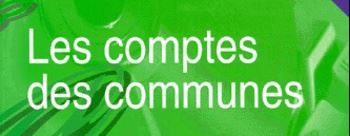

The object of this project is to make an study of the open database "les comptes des communnes".
Database: https://www.data.gouv.fr/fr/datasets/comptes-des-communes-2012-2020/

It is important to highlight that we do not know anything about this data, so we will start from scratch. 

The first thing we will do, will be to download the libraries and the data.

In [2]:
import pandas as pd

In [1]:
import pandas as pd

data = pd.read_csv(r'C:\Users\crist\mentoring\comptes des communes\data\raw\base_communes.csv', sep=";", encoding="utf-8", low_memory=False)

data.head()

,exer,outre_mer,reg_code,reg_name,dep_code,dep_name,epci_code,epci_name,tranche_population,rural,...,ordre_analyse1_section2,ordre_analyse1_section3,ordre_analyse2_section1,ordre_analyse2_section2,ordre_analyse2_section3,ordre_analyse3_section1,ordre_analyse3_section2,ordre_analyse3_section3,ordre_analyse4_section1,ordre_affichage
0,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070787.0,CC du Plateau de Lannemezan,2.0,Oui,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
1,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
2,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
3,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0
4,2012,Non,76.0,Occitanie,65,Hautes-Pyrénées,200070811.0,CC Pyrénées Vallées des Gaves,3.0,Non,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,10.0


The dimensions of our dataframe:

In [2]:
data.shape

(18120499, 42)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18120499 entries, 0 to 18120498
Data columns (total 42 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   exer                                   int64  
 1   outre_mer                              object 
 2   reg_code                               float64
 3   reg_name                               object 
 4   dep_code                               object 
 5   dep_name                               object 
 6   epci_code                              float64
 7   epci_name                              object 
 8   tranche_population                     float64
 9   rural                                  object 
 10  montagne                               object 
 11  touristique                            object 
 12  tranche_revenu_imposable_par_habitant  float64
 13  qpv                                    object 
 14  com_code                               object 
 

We are going to try to find out the meaning of all the variables

### DEFINITIONS

- epci: Établisements publics de coopération intercommunale
- qpv: Quartier de la politique de la ville.
(La politique de la ville est une politique de cohésion urbaine et de solidarité envers les quartiers les plus défavorisés. Elle vise à restaurer l'égalité républicaine et à améliorer les conditions de vie des habitants en mobilisant toutes les politiques publiques.)
- Tranche population: répartition de la population par age. 11 tranches.
- tranche_revenu_imposable_par_habitant: tranche correspondant à des taux d'imposition (Il y en a 5)
- Siren: système informatique pour le répertoire des entreprises et des établissements (unique identifier)
- insee: Le code INSEE (Institute for Statistics)
- ident ??? quelque sort d'identifiant mais pas connu. Il y en a 84952 différents
- lbudg: localitation budget??
- nomen: Nomenclatures comptables (números de cuentas)
- agregat: grandeur synthétique mesurant le résultat de l'activité économique.Le principal agrégat est le PIB. Macrodatos
- ptot: Poblation total
- presence_budget: Il n'y a que la valeur 1. À éliminer?
- cbudg ?? Il n'y a que les valeurs 1 et 3
- agregat: Agregat description
- agregat niveau: Il y en a 7 niveau

There are as well a column that only have the value 1. This column is not going to bring us any information, so we can eliminate it.

In [5]:
data = data.drop(['presence_budget'], axis=1)

__MISSINGS ANALYSIS__


Do we have missing values? As we are working with a big dataframe it is important to know if we have so many rows with missing values for all the variables. In this case, we could eliminate lines easing our job.  
If not, we must study what are the possibilities.

In [2]:
data.isnull().sum(axis = 0)

exer                                            0
outre_mer                                   12008
reg_code                                    12008
reg_name                                    12326
dep_code                                    12008
dep_name                                    12326
epci_code                                   18145
epci_name                                   18463
tranche_population                          12008
rural                                       12008
montagne                                    12008
touristique                                 12008
tranche_revenu_imposable_par_habitant       12008
qpv                                         12008
com_code                                    12008
com_name                                    12008
categ                                           0
siren                                           0
insee                                       12008
ident                                           0


At first glance, we see that in general the number of missings is not so high, except for the variables ordre_analyse and ordre_affichage.
There are some variables that have the same number of missing, that makes us think in a possible relation between this variables.

We are going to see it graphically to try to understand it better.

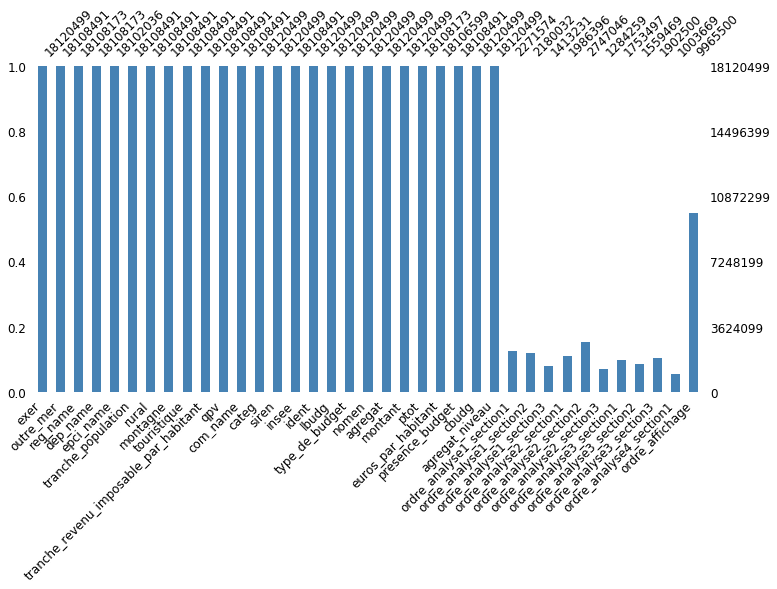

In [8]:
import missingno as msno

msno.bar(data, figsize=(12, 6), fontsize=12, color="steelblue");

A priori, the missings is not a problem, visually we can see that the ordre_analyse and ordre_affichage variables we will eliminate it because the no missing data is not enough to give us information. 
Regarding the rest of variables, if we eliminate the entries would not be a problem because we speak of a 0.07% of missings data that are not going to impact in our results.
In any case, as the variable "montant" has always information, and it seems that there is a relation between most of the misings variables, we are going to see if exist a pattern that allow us to find the missings. 

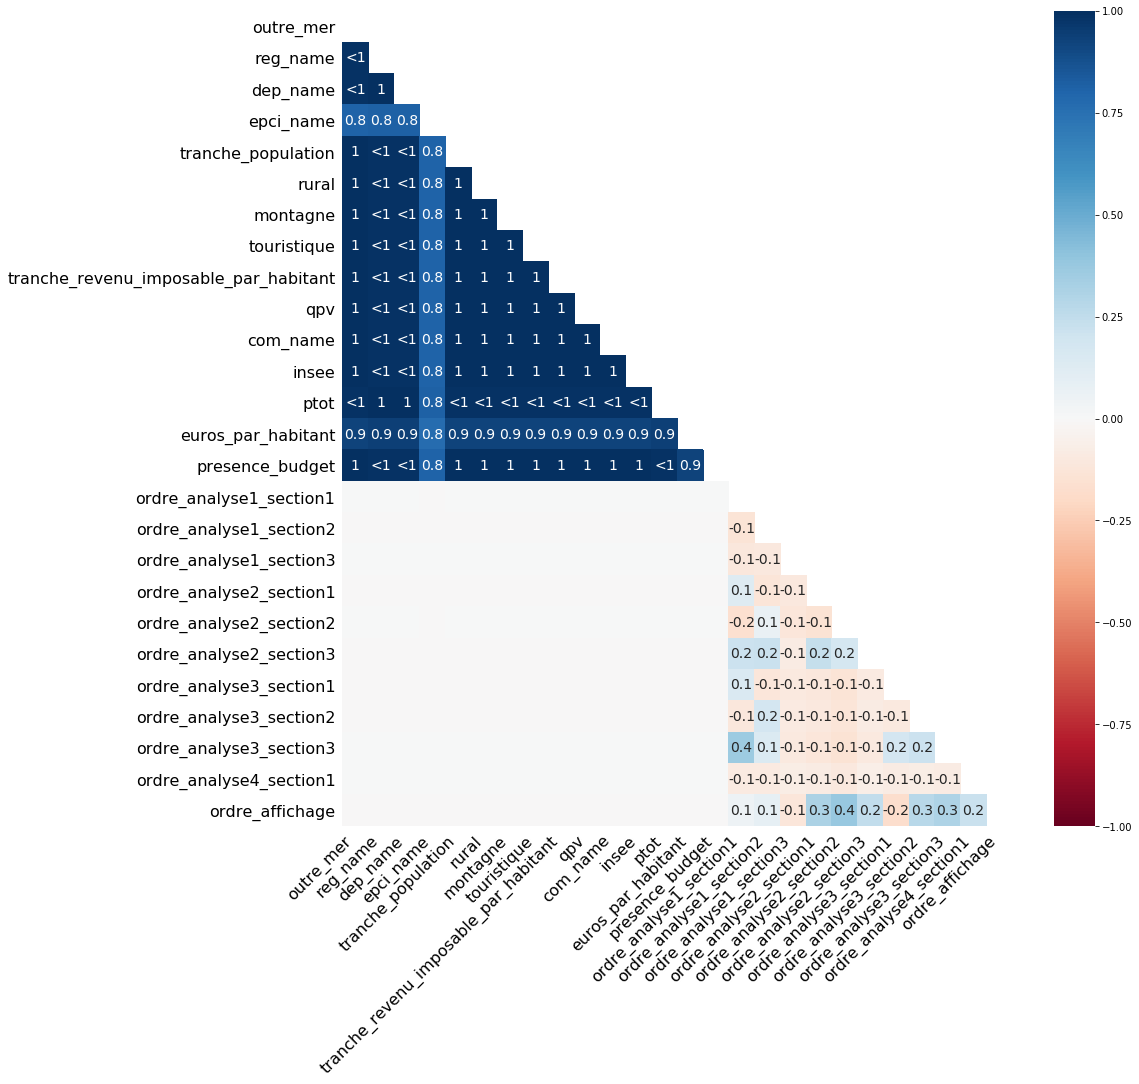

In [10]:
 msno.heatmap(data, figsize=(15, 15));

As we thought, there is a relation between the variables with missings, which leads us to a deply analysis that perhaps allows us to identify the pattern and consecuently the missings values.

Firstly, we will eliminate the columns ordre_analyseX_sectionX

In [2]:
#data['ordre_analyse1_section1','ordre_analyse1_section2','ordre_analyse1_section3','ordre_analyse2_section1','ordre_analyse2_section2',
#'ordre_analyse2_section3','ordre_analyse3_section1','ordre_analyse3_section2','ordre_analyse3_section3','ordre_analyse4_section1',
#'ordre_affichage'].isnull().sum(axis = 0)

data =data.drop(['ordre_analyse1_section1','ordre_analyse1_section2','ordre_analyse1_section3','ordre_analyse2_section1','ordre_analyse2_section2',
'ordre_analyse2_section3','ordre_analyse3_section1','ordre_analyse3_section2','ordre_analyse3_section3','ordre_analyse4_section1',
'ordre_affichage'], axis = 1)

We have seen, in the sumary of missing data, that the columns reg_name, reg_code, dep_code and dep_name have the same information and the number of missing are not the same. Hence, we are going to extract all information to leave both columns with the same information to be able then to eliminate one of each pair.

reg_code/ reg_name    
dep_code/ dep_name 
epci_code/ epci_name

To start with that, we will separate our missing data in a dataframe. That will allow us to work easily.

In [3]:
missing = data[data.isnull().any(axis=1)]

data_index = data.index 
missing_index = missing.index
no_missing_index = []
for element in data_index:
    if element not in missing_index:
        no_missing_index.append(element)
        

no_missing = data.iloc[no_missing_index]

In [9]:
# reg_name and reg_code
reg_no_null = missing[~missing['reg_code'].isnull()]
reg_code = reg_no_null['reg_code'].unique()

d={}
for element in reg_code:
    s = reg_no_null.loc[reg_no_null['reg_code'] == element,'reg_name']
    sol = next(item for item in s if item is not None)
    d[element] = sol
    if pd.isnull(sol):
        s = data.loc[data['reg_code'] == element,'reg_name']
        sol=next(item for item in s if item is not None)
        d[element] = sol

for i, row in missing.iterrows():
    for element in d:
        if row['reg_code'] == element:
            missing.at[i,'reg_name'] = d[element]

# dep_name and dep_code
dep_no_null = missing[~missing['dep_code'].isnull()]
dep_code = dep_no_null['dep_code'].unique()

d={}
for element in dep_code:
    s = dep_no_null.loc[dep_no_null['dep_code'] == element,'dep_name']
    sol = next(item for item in s if item is not None)
    d[element] = sol
    if pd.isnull(sol):
        s = data.loc[data['dep_code'] == element,'dep_name']
        sol=next(item for item in s if item is not None)
        d[element] = sol

for i, row in missing.iterrows():
    for element in d:
        if row['dep_code'] == element:
            missing.at[i,'dep_name'] = d[element]

# epci_code/ epci_name
#We are going to keep the epci_name column. But we are going to verify if from the codes we can extract some epci names, because 
#althoug the number of missings are less in epci_name maybe there are not the same and we can extract some information.




In [11]:
# We transform the from exponencial to decimal
import numpy as np

missing['epci_code'] = missing['epci_code'].apply(lambda x:x if pd.isnull(x) else "%.0f" % float(x))

epci_code_no_null = missing[~missing['epci_code'].isnull()][['epci_code','epci_name']]

dif = epci_code_no_null[epci_code_no_null['epci_name'].isnull()][['epci_code','epci_name']]
dif = dif.epci_code.unique()

for element in dif:
    if element in no_missing['epci_code']:
        print('The epci_code missing does not exist in the whole dataframe')
    else:
        print('The epci_code missing does not exist in the whole dataframe')

The epci_code missing does not exist in the whole dataframe
The epci_code missing does not exist in the whole dataframe


C:\Users\crist\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


We have not the numbers in the no_missing dataframe, so we can not extract information from there. 
To move fordward in our investigation of patterns, looking at our missing dataset, we have deduced that the field lbudg contains  the com_name. The patterns that we have found are the followings:
    - If there are only one word, this is directly the name that we were searching for, so just enough to copy from lbudg to com_name.
    - When the com_name is composed it goes in almost all the cases with a dash
    - When there are more than a word and the com_name is not composed the com_name is the last word.

In [12]:
import re
#r3 = re.compile(r"[^-]+$") from - ahead

# Composed names
r1 = re.compile(r"([a-zA-Z0-9.-áè]+-[a-zA-Z'.-]+)")

# One unique name or several names (we keep the last one)

r2 = re.compile(r"[^\W]+$")

for i, row in missing.iterrows():
    missing.at[i,'com_name'] = r1.findall(missing.at[i,'lbudg'])
for i, row in missing.iterrows():
    if not row['com_name']:
        missing.at[i,'com_name'] = r2.findall(missing.at[i,'lbudg'])

for i, row in missing.iterrows():
    if not row['com_name']:
         missing.at[i,'com_name'] = row['lbudg']
    
# We undo the list that is automatically done.
       
for i, row in missing.iterrows():
    missing.at[i,'com_name'] = "".join(row['com_name']) 

# We have detected that in some cases there are some words "RESTAURANT", "EAU", "ASSAT" following for a dash that are in our row and we did not want it.
#So, we will remove it.
words = ["ASST-", "RESTAURANT-", "EAU-", "LOTS-", "FORETS-", "1-", "HBS-", "SPANC-", "LOT-"]
for i, row in missing.iterrows():
    for word in words:
        if word in row['com_name']:
            missing.at[i,'com_name'] = row['com_name'].replace(word, "")
            
# Now, as in our dataframe "data" we have the column com_name in lowercase, we are going to transform it:
# For that the easiest way is to convert into lowercase and then make a title:
for i,row in missing.iterrows():
    missing.at[i,'com_name'] = row['com_name'].lower()
    missing.at[i,'com_name'] = row['com_name'].title()
    
# we have identified at the end of some words the articles that is necesary to eliminate ['(Le )', '(La )', '(Les)']

for i, row in missing.iterrows():
    if '(Le )' in row['com_name']:
        row['com_name'] = row['com_name'].replace(' (Le )', "")
        missing.at[i,'com_name'] = "Le" + " " +  row['com_name']
    if '(La )' in row['com_name']:
        row['com_name'] = row['com_name'].replace(' (La )', "")
        missing.at[i,'com_name'] = "La" + " " +  row['com_name']
    if '(Les)' in row['com_name']:
        row['com_name'] = row['com_name'].replace(' (Les)', "")
        missing.at[i,'com_name'] = "Les" + " " +  row['com_name']

# At this point we can look for the unique names to compare and change manually some names if it is necessary

for i, row in missing.iterrows():
    if "Magny" in row['com_name']:
        missing.at[i,'com_name'] = "Le Magny"
    if 'Chapelle-De-Mardore' in row['com_name']:
        missing.at[i,'com_name'] = 'La-Chapelle-De-Mardore'
    if "Bihorel" in row['com_name']:
        missing.at[i,'com_name'] = "Bois-Guillaume-Bihorel"
    if "Dessous" in row['com_name']:
        missing.at[i,'com_name'] = "Saint-Offenge-Dessous"
    if "Chedoue" in row['com_name']:
        missing.at[i,'com_name'] = "Fresnaye-Sur-Chedouet"
    if row['com_name'] == "L'Ile" or row['com_name'] == "Ile" or "Yeu" in row['com_name']:
        missing.at[i,'com_name'] = "L'Ile de Yeu"


Ones we have found all the com_name missings, we are going to search the com_name that we have in our dataframe "data". For those com_name from "data_missing" that are in "data" we can extract the fields reg_name, dep_name, epci_name and outre_mer. 

In [20]:
com_name_missing = data_missing['com_name'].unique()

com_name_data = data['com_name'].unique()

common = []
for element in com_name_missing:
    if element in com_name_data:
        common.append(element)

common

['Thizy',
 'Vaugneray',
 'La Villeneuve',
 'Montigny',
 'Bois',
 'Le Magny',
 'Saint-Bonnet',
 'Corbon',
 'Champagne',
 'Goussainville',
 'Melay',
 'Larchamp',
 'Vrigny']

We are going to study deeply one of this communes chosen randomly:

In [21]:
Goussainville=data.loc[data['com_name']=='Goussainville']
Goussainville

,exer,outre_mer,reg_name,dep_name,epci_name,tranche_population,rural,montagne,touristique,tranche_revenu_imposable_par_habitant,...,lbudg,type_de_budget,nomen,agregat,montant,ptot,euros_par_habitant,presence_budget,cbudg,agregat_niveau
19477,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,GOUSSAINVILLE,Budget principal,M14,Dépenses d'intervention,2063634.25,31225.0,66.089167,1.0,1,4
19478,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,SERV EAU GOUSSAINVILLE,Budget annexe,M49,Dépenses d'intervention,0.00,31225.0,0.000000,1.0,3,4
19479,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,SERV ASST GOUSSAINVILLE,Budget annexe,M49,Dépenses d'intervention,0.00,31225.0,0.000000,1.0,3,4
93546,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,GOUSSAINVILLE,Budget principal,M14,Dépenses d'investissement hors remb,13992751.45,31225.0,448.126548,1.0,1,3
93547,2012,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,SERV EAU GOUSSAINVILLE,Budget annexe,M49,Dépenses d'investissement hors remb,241583.05,31225.0,7.736847,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18019879,2015,Non,Centre-Val de Loire,Eure-et-Loir,CC du Pays Houdanais (C.C.P.H.),3.0,Oui,Non,Non,2.0,...,GOUSSAINVILLE,Budget principal,M14,Encours de dette - Dettes bancaires et assimilées,157250.44,1275.0,123.333678,1.0,1,2
18054786,2015,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,GOUSSAINVILLE,Budget principal,M14,Encours de dette - Dettes bancaires et assimilées,51351675.99,31525.0,1628.919143,1.0,1,2
18054787,2015,Non,Île-de-France,Val-d'Oise,CA Roissy Pays de France,8.0,Non,Non,Non,1.0,...,EAU - GOUSSAINVILLE,Budget annexe,M49,Encours de dette - Dettes bancaires et assimilées,235531.04,31525.0,7.471246,1.0,3,2
18075528,2015,Non,Centre-Val de Loire,Eure-et-Loir,CC du Pays Houdanais (C.C.P.H.),3.0,Oui,Non,Non,2.0,...,GOUSSAINVILLE,Budget principal,M14,Epargne de gestion,131087.36,1275.0,102.813616,1.0,1,0


We can draw from that many important conclusions.

- For the same commun, we can have different reg_name, dep_name, epci_name
- This differences depends on the siren

We need therefore the different siren, we will search then if the sirens in our data_missing are in the data dataframe.

In [25]:
data_siren = data_no_missing['siren'].unique()
missing_siren = data_missing['siren'].unique()
common_siren = []
for element in missing_siren:
    if element in data_siren:
        common_siren.append(element)

common_siren

[]

We find that we do not have any of the siren in data_missings in our dataframe data. So, we could not find by this method the missings fields. We have learned anyway something important, that we should keep in mind: all the information (reg_name, dep_name, ptot...) relates to SIREN.
At this point, we can not imputate the missings because we do not have the means to figure it out. 
As the missing data represents less than a 0.07% of the total entries, we are going to continue the analysis with the dataframe no_missing.
Futher on, as we have for all the entries for the variable "amount" filled, we will do a modest study to do not leave anything out.  


We are going to drop the variables that are duplicated and we are going to save our datasets missing and no_missing and from now on we are going to work with no_missing that we will call: df.

In [14]:
import numpy as np

no_missing = no_missing.drop(['reg_code', 'dep_code', 'epci_code','com_code', 'montant'], axis=1)

no_missing.to_csv(r'C:\Users\crist\mentoring\comptes des communes\data\processed\df.csv')
missing.to_csv(r'C:\Users\crist\mentoring\comptes des communes\data\processed\missing.csv')


In [4]:
df = pd.read_csv(r'C:\Users\crist\mentoring\comptes des communes\data\processed\df.csv')

C:\Users\crist\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df.head()

,Unnamed: 0,exer,outre_mer,reg_name,dep_name,epci_name,tranche_population,rural,montagne,touristique,...,ident,lbudg,type_de_budget,nomen,agregat,montant,ptot,euros_par_habitant,cbudg,agregat_niveau
0,0,2012,Non,Occitanie,Hautes-Pyrénées,CC du Plateau de Lannemezan,2.0,Oui,Oui,Non,...,21650294800039,BA EAU LUTILHOUS,Budget annexe,M49A,Dépenses d'intervention,0.0,219.0,0.0,3,4
1,1,2012,Non,Occitanie,Hautes-Pyrénées,CC Pyrénées Vallées des Gaves,3.0,Non,Oui,Oui,...,21650295500067,BA GEST MICRO CENT YSE LUZ-SAINT-SAUVEUR,Budget annexe,M4,Dépenses d'intervention,0.0,1045.0,0.0,3,4
2,2,2012,Non,Occitanie,Hautes-Pyrénées,CC Pyrénées Vallées des Gaves,3.0,Non,Oui,Oui,...,21650295500075,THERMES-LUZ-SAINT-SAUVEUR,Budget annexe,M4,Dépenses d'intervention,0.0,1045.0,0.0,3,4
3,3,2012,Non,Occitanie,Hautes-Pyrénées,CC Pyrénées Vallées des Gaves,3.0,Non,Oui,Oui,...,21650295500083,BA ASSAIN LUZ-SAINT-SAUVEUR,Budget annexe,M49,Dépenses d'intervention,0.0,1045.0,0.0,3,4
4,4,2012,Non,Occitanie,Hautes-Pyrénées,CC Pyrénées Vallées des Gaves,3.0,Non,Oui,Oui,...,21650295500091,EAU LUZ-SAINT-SAUVEUR,Budget annexe,M49,Dépenses d'intervention,0.0,1045.0,0.0,3,4


So far, we have prepared the data and now is time to study the relation between variables and the influence of each one of them.
When we have studied the missings we have found some interensting things as we have some entries where the column "montant" that is 0. A priori, this is not as we think it should be. Why could be? we are going to try to find an explanation

**CORRELATION** 

To study the correlation between variables we are going to separate the variables in numericals and categoricals.

In [12]:
df.dtypes

Unnamed: 0                                 int64
exer                                       int64
outre_mer                                 object
reg_name                                  object
dep_name                                  object
epci_name                                 object
tranche_population                       float64
rural                                     object
montagne                                  object
touristique                               object
tranche_revenu_imposable_par_habitant    float64
qpv                                       object
com_name                                  object
categ                                     object
siren                                      int64
insee                                     object
ident                                      int64
lbudg                                     object
type_de_budget                            object
nomen                                     object
agregat             

We must readjust the variables because ther are some that are float but the reality is that they must be categorical

In [13]:
df[['tranche_population', 'tranche_revenu_imposable_par_habitant', 'cbudg', 'agregat_niveau']] = df[['tranche_population', 'tranche_revenu_imposable_par_habitant', 'cbudg', 'agregat_niveau']].astype('int')
df[['tranche_population', 'tranche_revenu_imposable_par_habitant', 'cbudg', 'agregat_niveau']] = df[['tranche_population', 'tranche_revenu_imposable_par_habitant', 'cbudg', 'agregat_niveau']].astype('O')

In [14]:
cat_data = df.select_dtypes(include=['O'])
num_data = df.select_dtypes(include=['int', 'float'])

_Numerical variables_

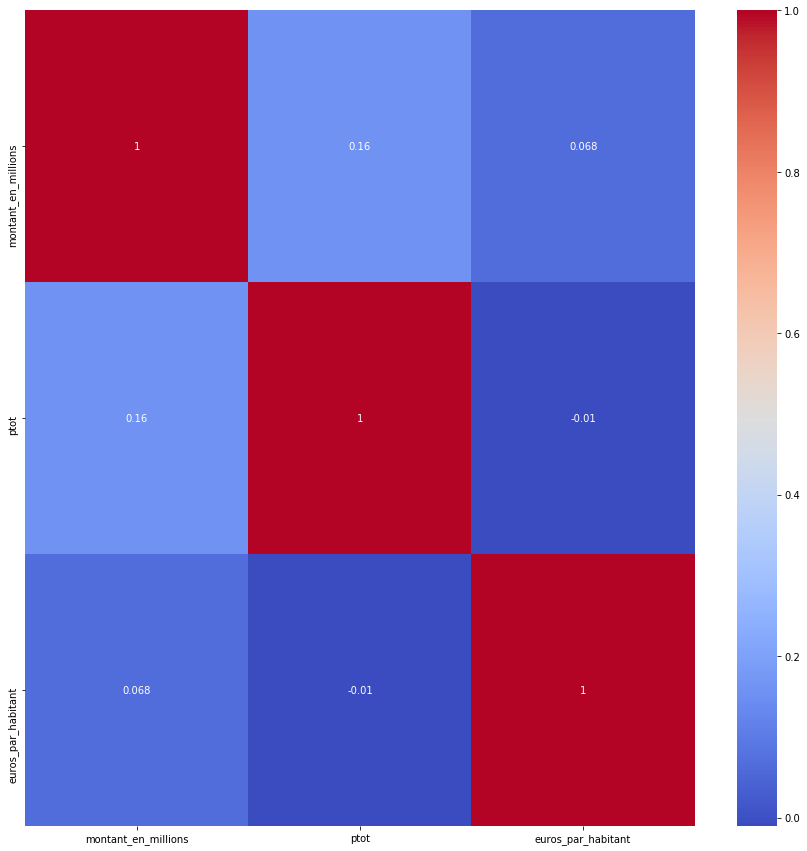

In [17]:
# Pearson correlation between continuous variables.
import matplotlib.pyplot as plt
import seaborn as sns

cor = df[['montant_en_millions', 'ptot', 'euros_par_habitant']].corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cor, annot=True, ax=ax, cmap="coolwarm");

In [29]:
from dython import nominal
nominal.associations(df,figsize=(20,10),mark_columns=True);

ModuleNotFoundError: No module named 'dython'


The linear relation between variables is weak. Is there any other relation?

In [20]:
import ppscore as pps
power_score = pps.matrix(df[['montant_en_millions', 'ptot', 'euros_par_habitant']])

#from visualization.utils import heatmap
import seaborn as sns

table = power_score.pivot(columns="x", index="y", values="ppscore")
#sns.heatmap(table, row_labels=list(table.index), col_labels=list(table.columns));
sns.heatmap(table, annot=True, ax=ax, cmap="coolwarm");


In [21]:
num_data.describe()

,montant_en_millions,ptot,euros_par_habitant,presence_budget
count,1.810046e+07,1.810046e+07,1.810046e+07,18100462.0
mean,4.053336e-01,3.569145e+03,1.815719e+02,1.0
std,1.132987e+01,4.358366e+04,5.365117e+02,0.0
min,-9.435051e+02,1.000000e+00,-4.169737e+04,1.0
25%,0.000000e+00,2.570000e+02,0.000000e+00,1.0
50%,1.529264e-02,6.180000e+02,2.855963e+01,1.0
75%,1.046006e-01,1.636000e+03,1.782894e+02,1.0
max,6.845968e+03,2.274880e+06,1.827898e+05,1.0


First of all we will search for the stadistical values, wich allow us to verify if there could be outliers

*Categorical variables*

The proportion of categories of each variable:

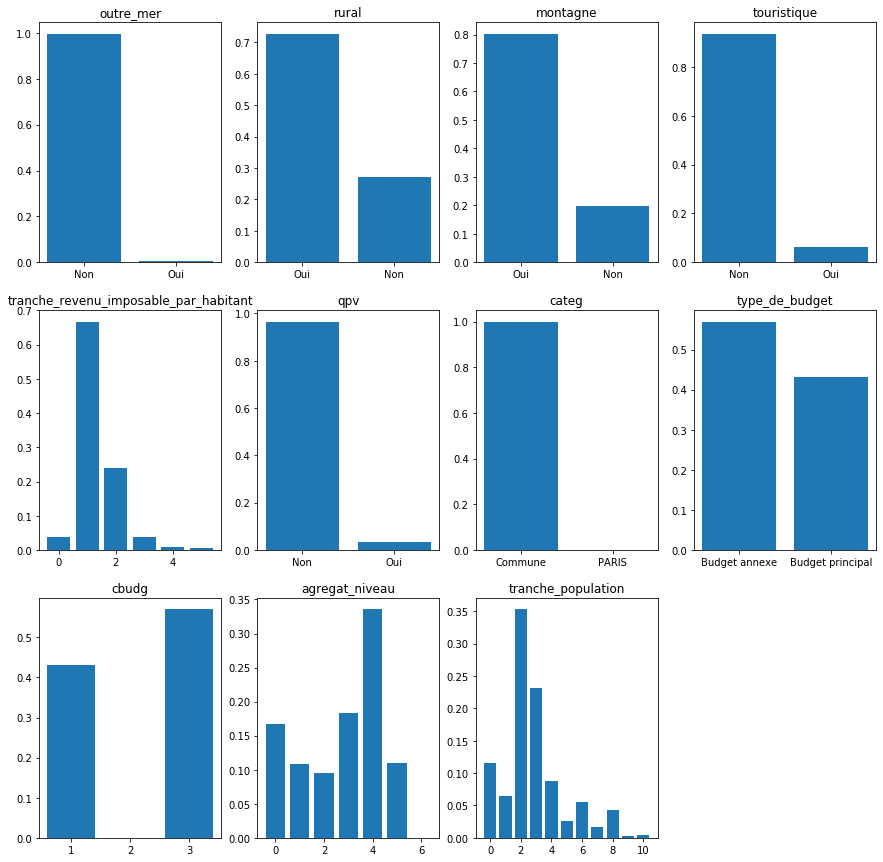

In [21]:
import matplotlib.pyplot as plt

l = ['outre_mer', 'rural', 'montagne', 'touristique', 'tranche_revenu_imposable_par_habitant', 'qpv', 'categ', 'type_de_budget', 'cbudg', 'agregat_niveau', 'tranche_population' ]
i=1
plt.figure(figsize= (15,15)) 
for element in l:
    plt.subplot(3,4,i)
    plt.bar(cat_data[element].unique(), cat_data[element].value_counts(normalize=True))
    plt.title(element);
    i+=1


This first analysis give us a first idea of the data. As we could expect, there is a minority of data that belongs to outre_mer.
Most of the budget goes to or comes from rural or mountain cities and the majority are no turistic. 
The minority of the data has a priority neighborhood under the wing of the city policy.
To go further we need to decrease zoom in the variables and to set an specific objective, since we have a lot of information.



### DATA ANALYSIS

First of all, we are going to separate our analysis in outre_mer and metropolitan, and we are going to separate in years

- First Question is: how many communes for each region have QPV, are rurals, mountain or touristic?

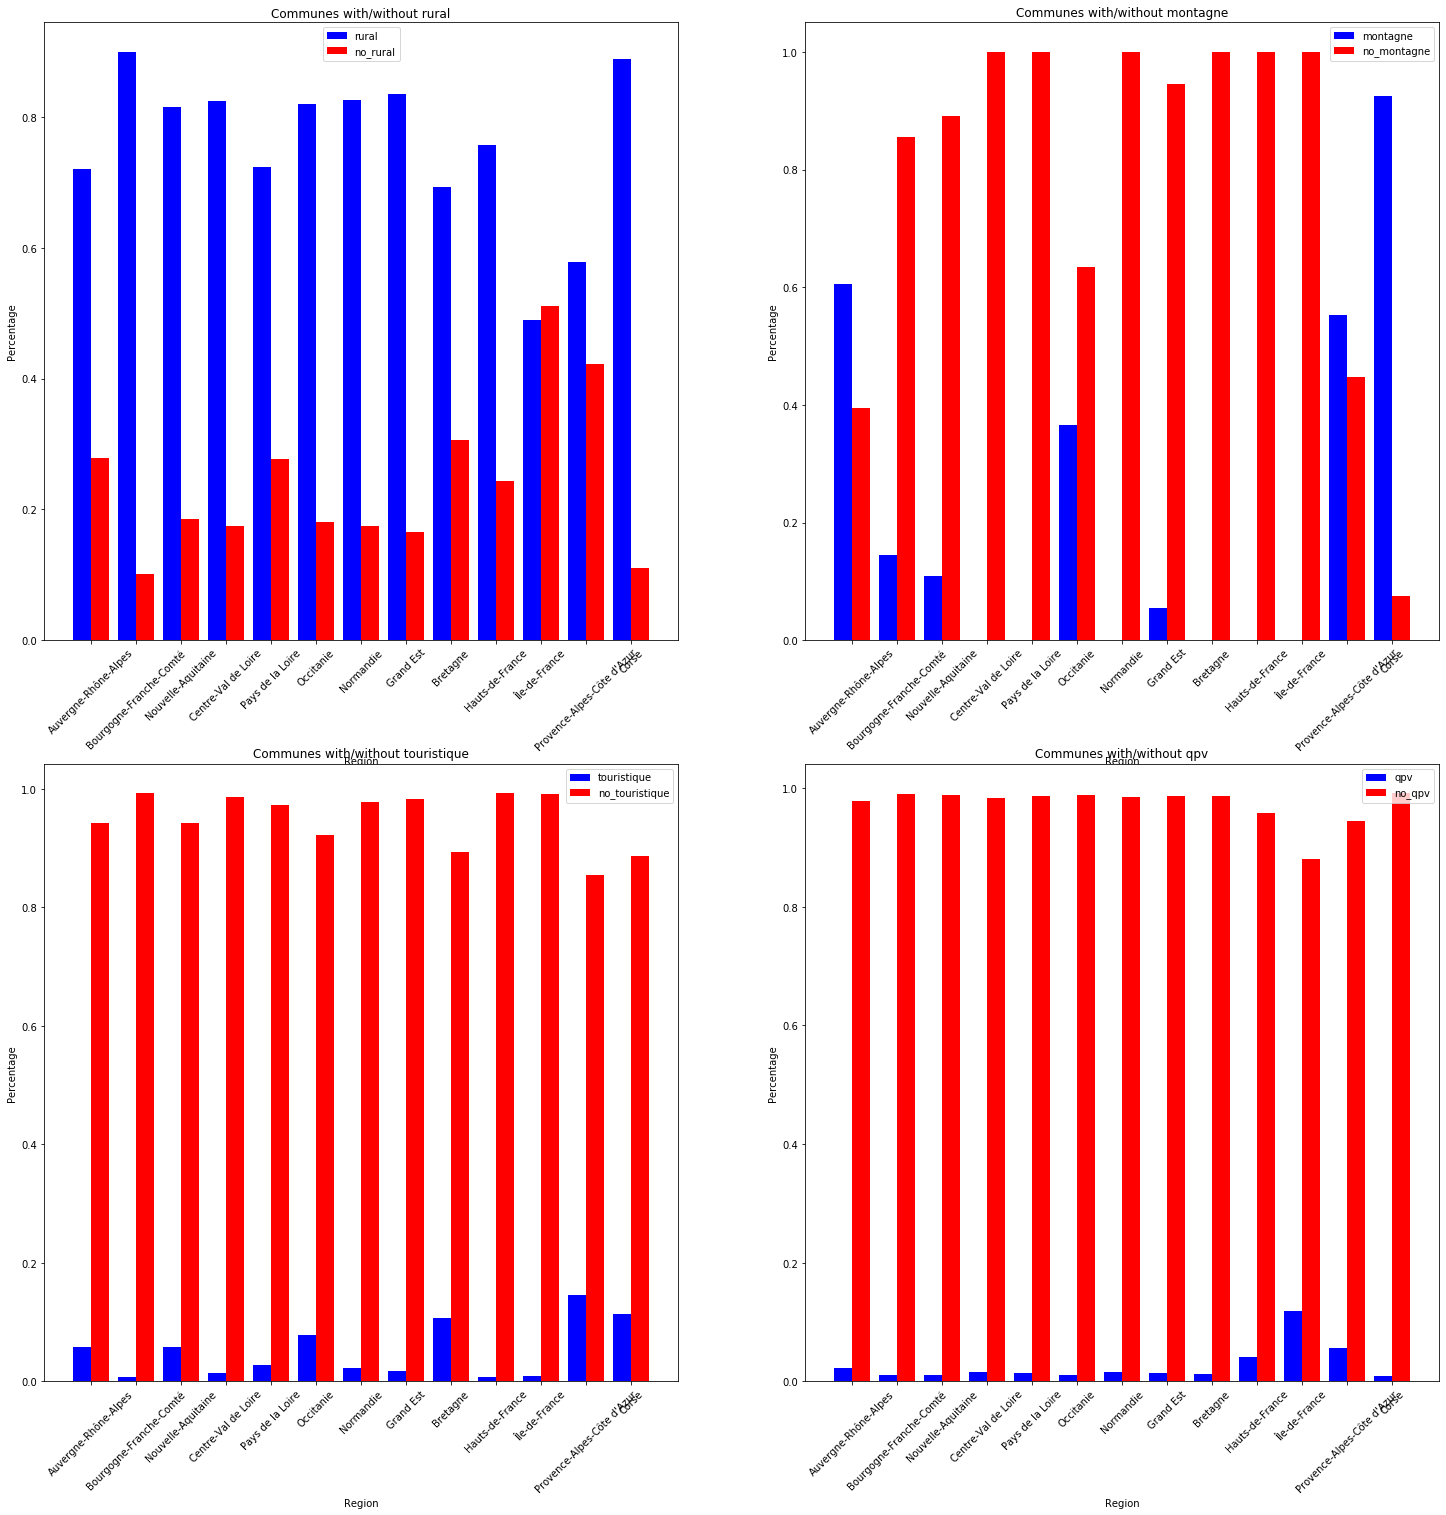

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

year = 2019
outre_mer = 'no'   # options: 'yes', 'no'

def cre_df(year, outre_mer='yes'):
    year = year
    if outre_mer == 'yes':
        dt = df[df['outre_mer']=='Oui']
        dataframe = dt[dt['exer'] == year]
    else:
        dt = df[df['outre_mer']=='Non']
        dataframe = dt[dt['exer']== year]

    return dataframe

if outre_mer == 'yes':
    name = 'outre_mer' + '_' + str(year)
else:
    name = 'metropolitan' + '_' + str(year)
    
globals()[name] = cre_df(year, outre_mer=outre_mer)

regions = globals()[name]['reg_name'].unique()

options = ['rural', 'montagne', 'touristique', 'qpv']

d = {}
for element in options:
    for i in ['yes', 'no']:
        d[element+ '_'+ i] = [None for _ in range (len(regions))]
    
i=0
for r in regions:
    for o in options:       
        data = globals()[name][globals()[name]['reg_name']==r]
        total_commune = data['com_name'].nunique()
        globals()[o] = data[data[o]=='Oui']
        globals()[o + '_' + 'no'] = data[data[o] == 'Non']
        globals()['total_' + o] = globals()[o]['com_name'].nunique()
        globals()['total_'+ o + '_' + 'no'] = total_commune - globals()['total_' + o] 
        perc_yes = globals()['total_' + o]/total_commune
        perc_no = globals()['total_'+ o + '_' + 'no'] / total_commune
        d[o +'_'+'yes'][i]=perc_yes
        d[o +'_'+'no'][i]=perc_no
    i+=1

graph = ['rural', 'montagne', 'touristique', 'qpv']

plt.figure(figsize= (25,25))
i = 1
for element in graph:
    plt.subplot(2,2,i)
    w = 0.4
    x = regions
    bar1 = np.arange(len(x))
    bar2 = [i+w for i in bar1]
    y1 = element + '_' + 'yes'
    y2 = element + '_' + 'no'
    plt.bar(bar1,  d[y1], w, color = 'blue', label = element)
    plt.bar(bar2,  d[y2], w, color = 'red', label = 'no_' + element)
    plt.xlabel('Region')
    plt.ylabel('Percentage')
    plt.xticks(bar1+w/2,x, rotation=45)
    plt.legend()
    plt.title('Communes with/without' + " " + element)
    i+=1

Is here any relation between tax and the fact that being rural, touristic, montain or having qpv?

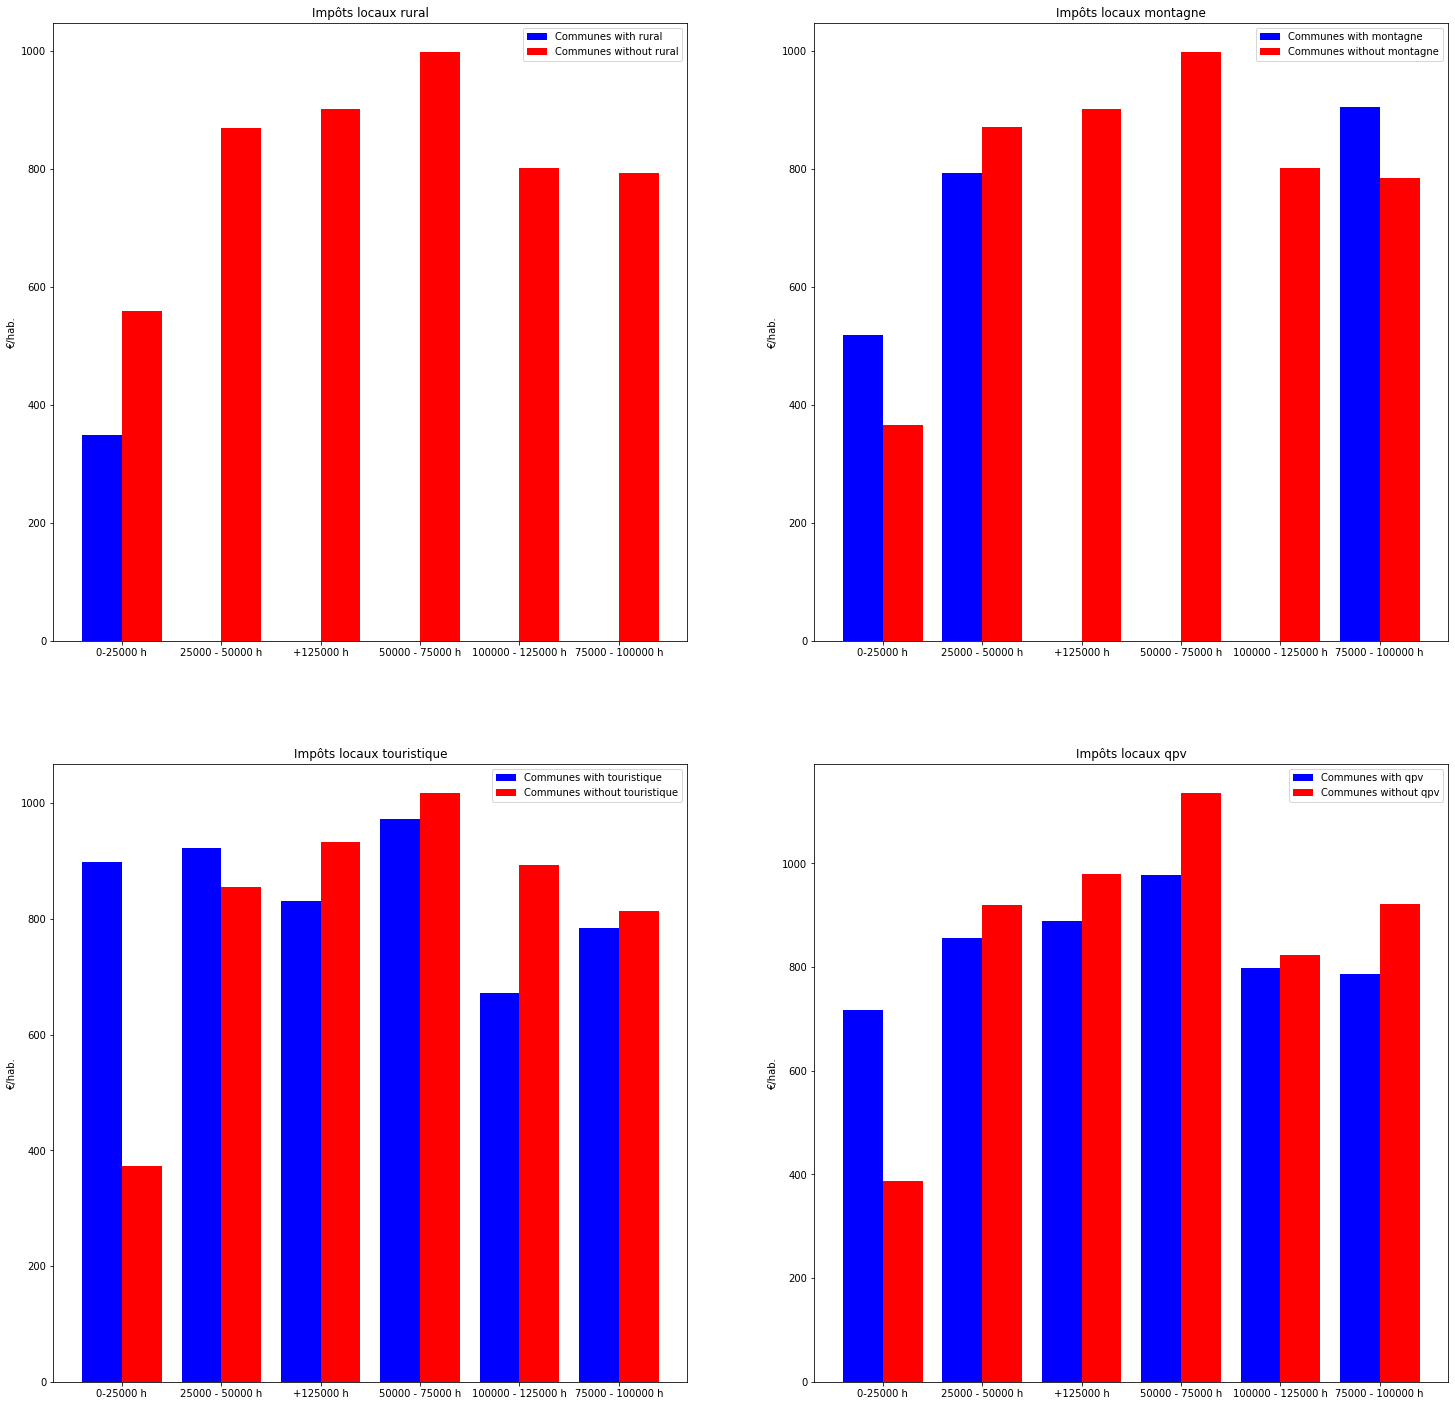

In [21]:

year = 2019
outre_mer = 'no'  # options: 'yes', 'no'


def cre_df(year, outre_mer='yes'):
    year = year
    if outre_mer == 'yes':
        dt = df[df['outre_mer']=='Oui']
        dataframe = dt[dt['exer'] == year]
    else:
        dt = df[df['outre_mer']=='Non']
        dataframe = dt[dt['exer']== year]

    return dataframe

if outre_mer == 'yes':
    name = 'outre_mer' + '_' + str(year)
else:
    name = 'metropolitan' + '_' + str(year)
    
globals()[name] = cre_df(year, outre_mer=outre_mer)
globals()[name]['pop_group'] = pd.cut(globals()[name]['ptot'],[0,25000,50000,75000,100000,125000, globals()[name]['ptot'].max()], 
                                      labels= ['0-25000 h', '25000 - 50000 h', '50000 - 75000 h', '75000 - 100000 h', '100000 - 125000 h', '+125000 h'], 
                                      include_lowest=True)

options = ['rural', 'montagne', 'touristique', 'qpv']

    
i=0
for o in options:
    globals()[o] = globals()[name][globals()[name][o]=='Oui']
    globals()[o + '_' + 'no'] = globals()[name][globals()[name][o]=='Non']
    globals()[o] = globals()[o][globals()[o]['agregat']=='Impôts locaux']
    globals()[o + '_' + 'no'] = globals()[o + '_' + 'no'][globals()[o + '_' + 'no']['agregat']=='Impôts locaux']
    globals()[o + '_' + 'sum'] = globals()[o].groupby(['pop_group']).agg({'euros_par_habitant':'mean'})
    globals()[o + '_' + 'no' + '_' + 'sum'] = globals()[o + '_' + 'no'].groupby(['pop_group']).agg({'euros_par_habitant':'mean'})
    globals()[o + '_' + 'sum'] =  globals()[o + '_' + 'sum'].fillna(0)
    globals()[o + '_' + 'no' + '_' + 'sum'] = globals()[o + '_' + 'no' + '_' + 'sum'].fillna(0)
    

plt.figure(figsize= (25,25))
i = 1
for o in options:
    plt.subplot(2,2,i)    
    w = 0.4
    x = globals()[name]['pop_group'].unique()
    bar1 = np.arange(len(x))
    bar2 = [i+w for i in bar1]
    plt.bar(bar1,  globals()[o + '_' + 'sum']['euros_par_habitant'], w, color = 'blue', label = 'Communes with' + " " + o)
    plt.bar(bar2,  globals()[o + '_' + 'no' + '_' + 'sum']['euros_par_habitant'], w, color = 'red', label = 'Communes without' + " " + o)
    #plt.xlabel('')
    plt.ylabel('€/hab.')
    plt.xticks(bar1+w/2,x)
    plt.legend()
    plt.title('Impôts locaux' + ' ' + o)
    i+=1


By the Pearson correlation we can not extract so much information. The montant variable is not really related with the other numerical variables.

To go further we are going to analyze the communes with qpv.
The qpv is a political policy that has the goal of reducing the complexity of the socially deprived areas.
So, only with this definition, we could think that the communes with a qpv are more likely to expirience highest debt ratios and 
lower savings ratios. We are going to study with the population.

C:\Users\crist\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


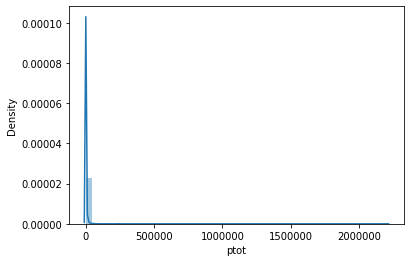

In [28]:
import seaborn as sns
def displot_ptot(year, outre_mer = 'yes'):
    data = df[df['exer']== year]
    if outre_mer == 'yes':
        data =data[data['outre_mer'] == 'Oui']
    else:
        data = data[data['outre_mer'] == 'Non']

    return sns.distplot(data.ptot)

disp = displot_ptot(2020, outre_mer = 'no');

In [ ]:
import seaborn as sns
sns.distplot(outre_mer_2019.ptot);

In [ ]:
dettes = ['Encours de dette','Encours de dette - Dépôts et cautionnements reçus', 'Encours de dette - Dettes bancaires et assimilées', 
          ]
Dépenses = ["Dépenses d'équipement", 'Dépenses de fonctionnement', "Dépenses d'intervention", "Dépenses d'investissement hors remb",
         'Frais de personnel','Fiscalité reversée', 'Charges financières', 'Dépôts au Trésor', 'Achats et charges externes', 'Autres dotations et subventions',
           ]
Epargne = ['Epargne de gestion', 'Recettes de fonctionnement', "Recettes d'investissement hors emprunts", ,
          'Autres impôts et taxes', 'Impôts locaux']   
       
    
    'FCTVA', 'Fonds de soutien aux emprunts à risque','Péréquations et compensations fiscales',
       "Produit des cesssions d'immobilisations",
       ,
       'Autres dotations de fonctionnement',
       , "Concours de l'Etat",
       
       'DETR', 'Dotation globale de fonctionnement',
       